### DataJam 2025 | Data Visualization Workshop

-------

Welcome to the second DataJam 2025 workshop - Data Visualization with Python!

To participate in this workshop, you will first need to download our datasets for today:
- MedianHouseholdIncome2015
- PercentagePeopleBelowPovertyLevel
- PercentOver25CompletedHighSchool
- ShareRaceByCity
- PoliceKillingsUS
sourced from [Kaggle](https://www.kaggle.com/datasets/kwullum/fatal-police-shootings-in-the-us) (Karolina Wullum). You can quickly download the dataset here: [Direct Link](https://drive.google.com/drive/folders/1rSuhIpmsGqpGDP5OSGPUNOWUiXSj6GGS?usp=sharing)
---

In [1]:
!pip install pandas matplotlib seaborn numpy


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# import datasets
median_house_hold_in_come = pd.read_csv('data/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('data/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('data/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('data/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('data/PoliceKillingsUS.csv', encoding="windows-1252")

## Bar Graph/Plot

First, we will work with our `percentage_people_below_poverty_level` dataset. We can do some intial exploration on this dataset before we begin creating graphs. This workshop is focused on how to create good plots, so we will skip past most of the "exploratory data analysis (EDA)" stage, and the data cleaning stage. In reality, both of these steps should be taken before you start plotting. Our datasets are already cleaned, however.

As we work through this notebook, feel free to change different numbers and experiment to see how we can change our graphs easily using matplotlib and seaborn!

In [4]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [5]:
percentage_people_below_poverty_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [6]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

poverty_rate
0       1464
-        201
7.4      129
6.7      129
10       128
        ... 
73.7       1
92.7       1
72.4       1
68.2       1
94.1       1
Name: count, Length: 771, dtype: int64

In [7]:
percentage_people_below_poverty_level['Geographic Area'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_7208\4005406991.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  percentage_people_below_poverty_level.poverty_rate.replace({'-':0.0}, inplace = True)


Text(0.5, 1.0, 'Poverty Rate Given States')

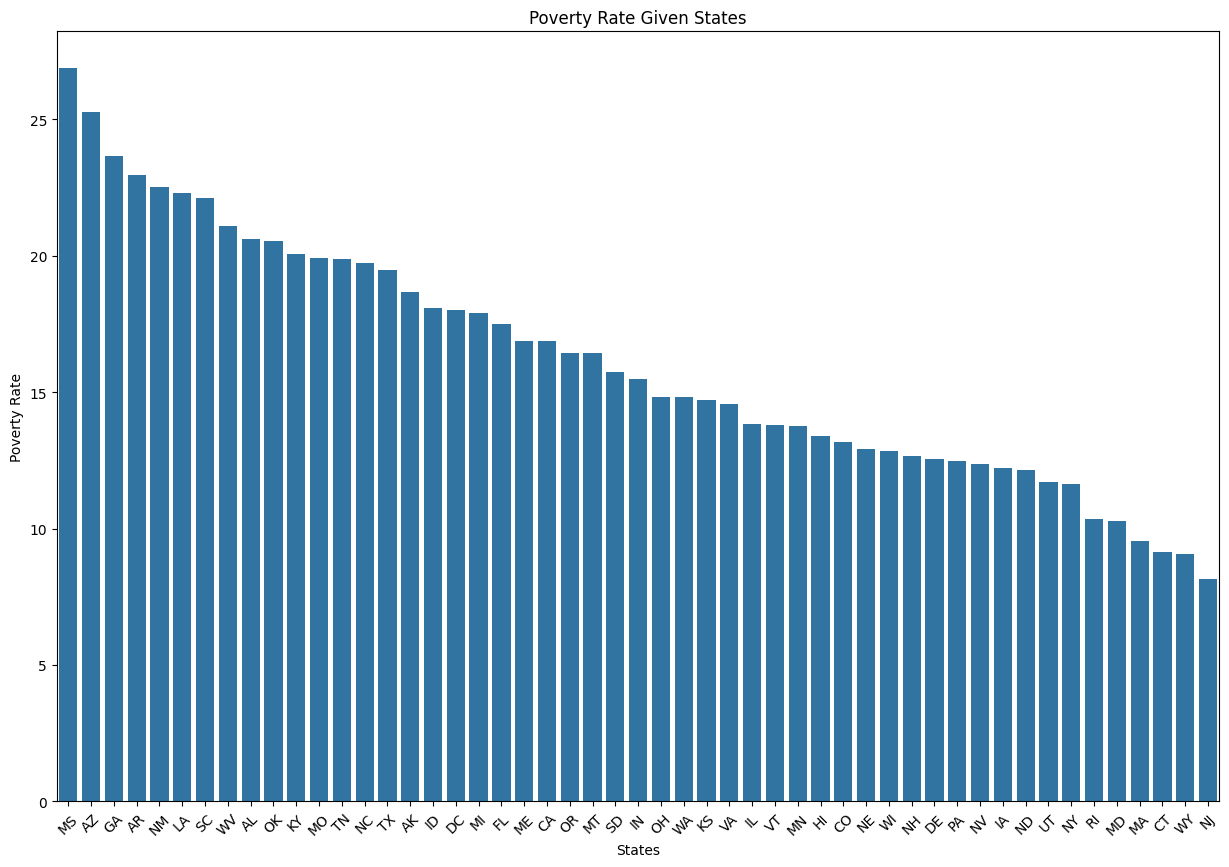

In [8]:
# Poverty rate of each state
percentage_people_below_poverty_level.poverty_rate.replace({'-':0.0}, inplace = True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['area_list'], y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

We can also take a look at `percent_over_25_completed_highSchool.csv` to construct another bargraph:

In [9]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [10]:
percent_over_25_completed_highSchool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


C:\Users\Daniel\AppData\Local\Temp\ipykernel_7208\2023215957.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)


Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

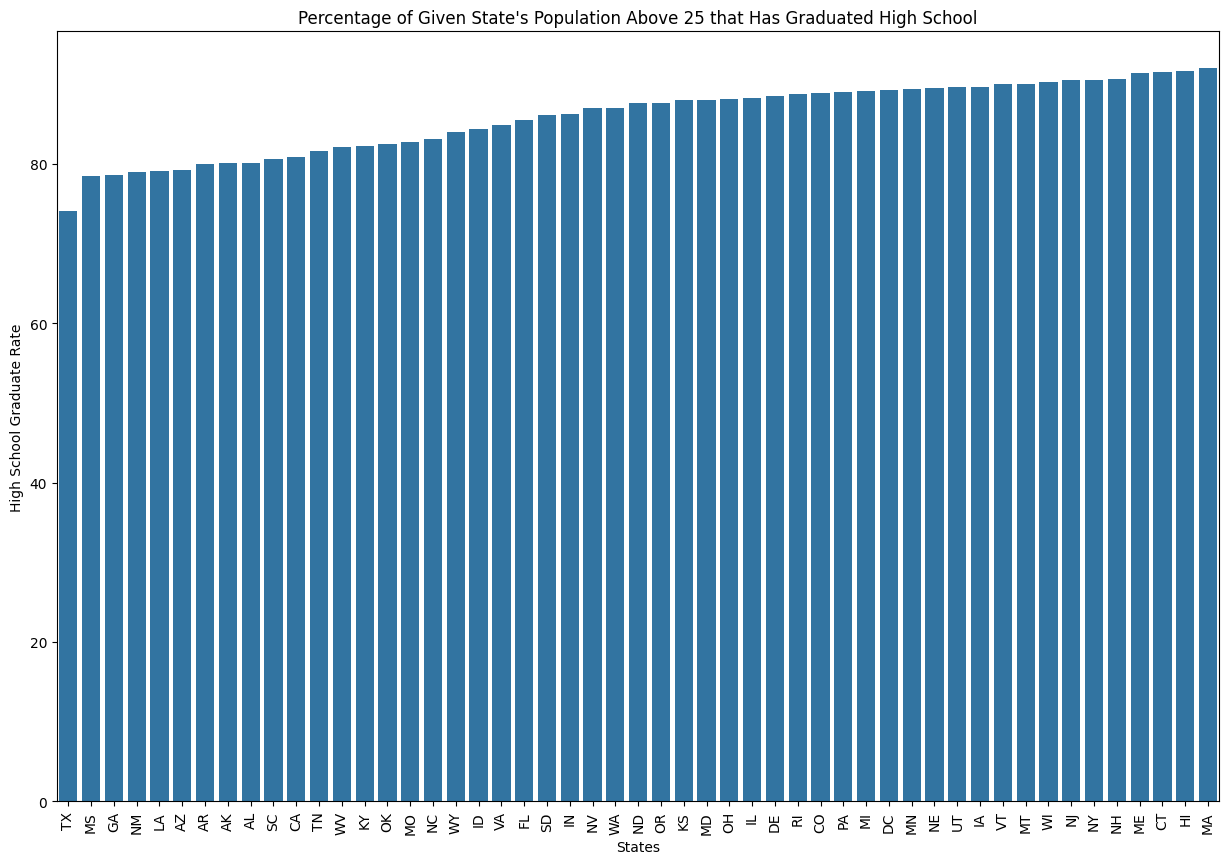

In [11]:
# High school graduation rate of the population that is older than 25 in states
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['area_list'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

## Point Graph/Plot

Combing both our `poverty_rates` and `highschool_graduation` data, we can construct the following **point plot**.

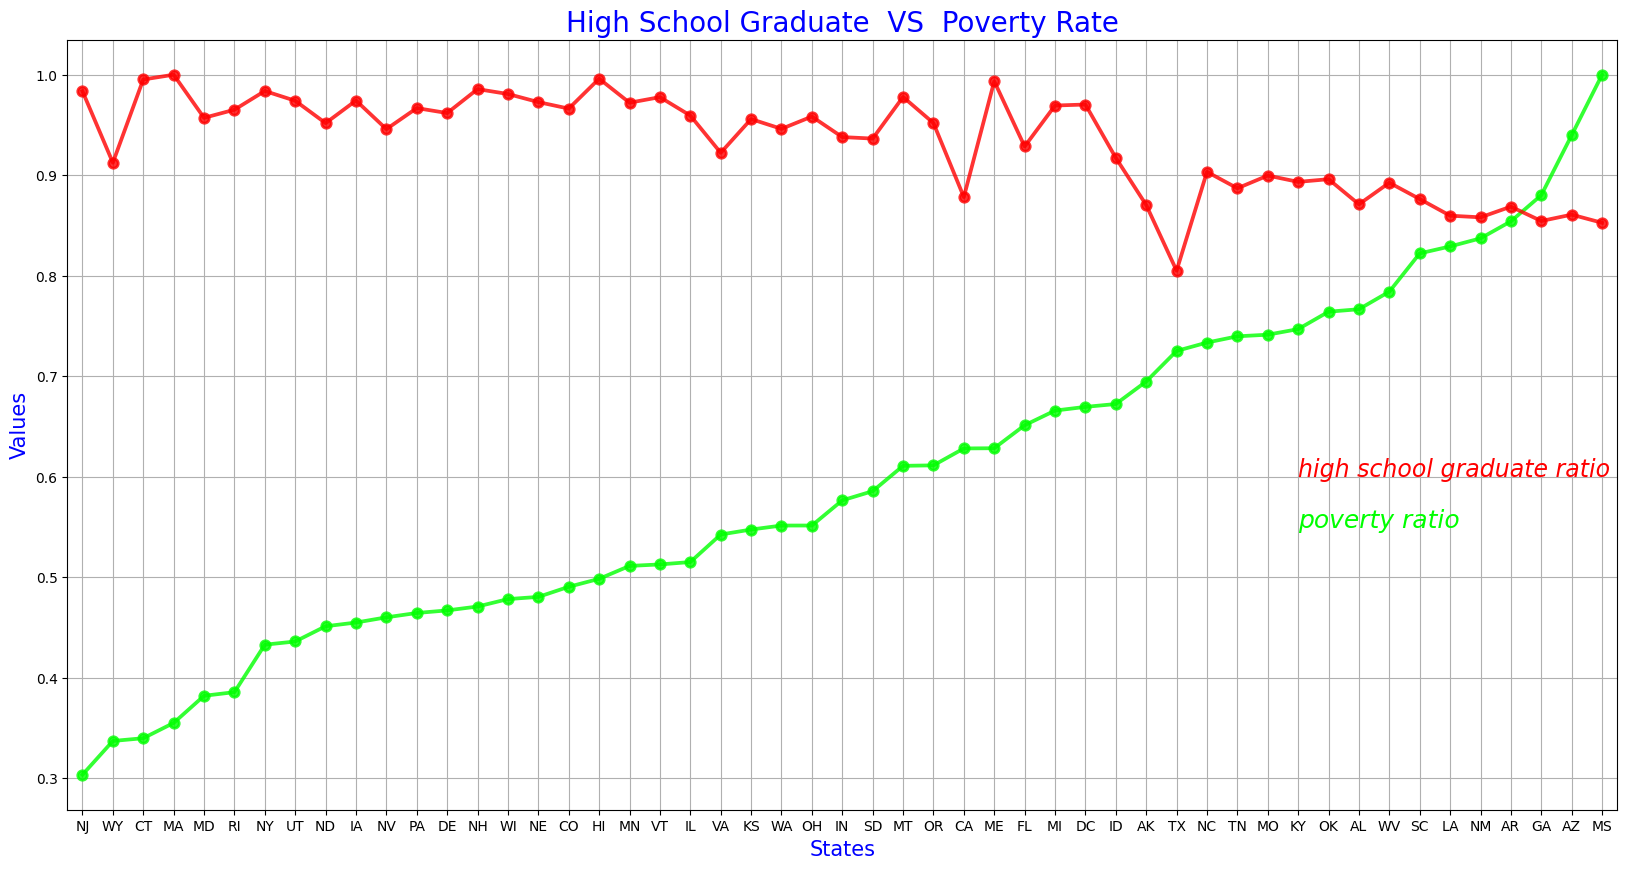

In [12]:
# high school graduation rate vs Poverty rate of each state
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize = 17,style = 'italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()

# Pie Graph/Plot

Using our 5th dataset, `PoliceKillingUS.csv` which we saved as `kill`, we can plot the ratio of police killings : race, as shown below:

In [13]:
kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

In [14]:
kill.race.value_counts()

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64

Text(0.5, 1.0, 'Killed People According to Races')

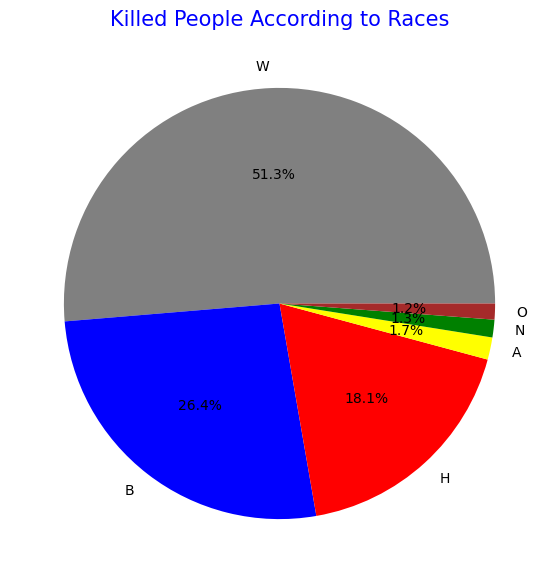

In [15]:
# Race rates according in kill data 
kill.race.dropna(inplace = True)
labels = kill.race.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = kill.race.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

# Linear Model/Regression (lm) Graph/Plot

Using our `high school graduation rate vs. poverty rate` data, which we simply saved as `data`, we can plot a regression line to view the correlation between the `area_poverty_ratio` and `area_highschool_ratio`:

In [ ]:
data.head()     

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


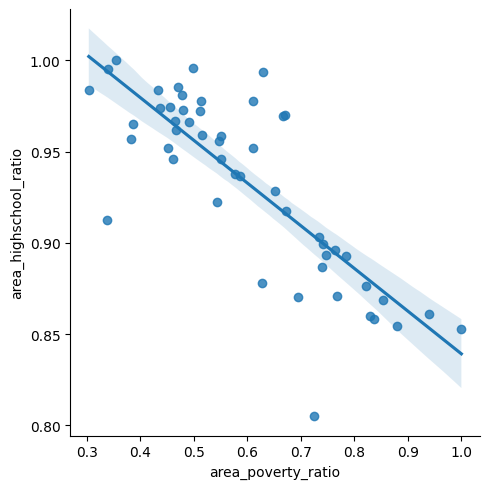

In [17]:
sns.lmplot(x="area_poverty_ratio", y="area_highschool_ratio", data=data)
plt.show()

In [20]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


In [23]:
data.corr(numeric_only=True)

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


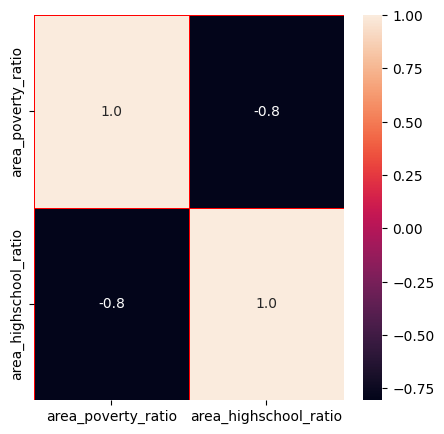

In [25]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

# Box Plot

In [26]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [27]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

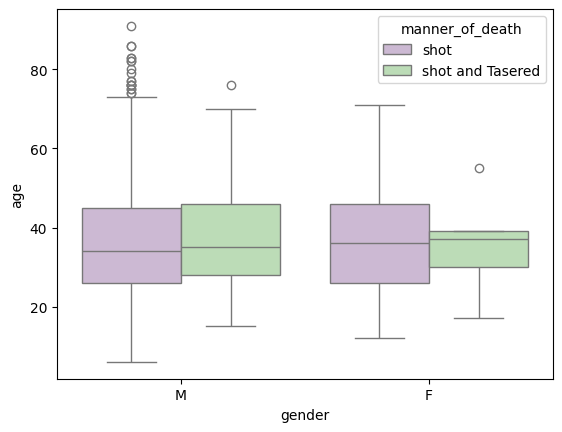

In [28]:
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=kill, palette="PRGn")
plt.show()

# Pair Plot

In [29]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


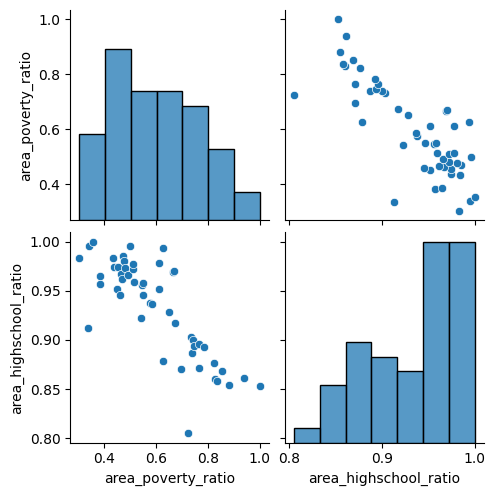

In [30]:
sns.pairplot(data)
plt.show()

# Count Plot

In [31]:
kill.gender.value_counts()

gender
M    2428
F     107
Name: count, dtype: int64

In [32]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Text(0.5, 1.0, 'gender')

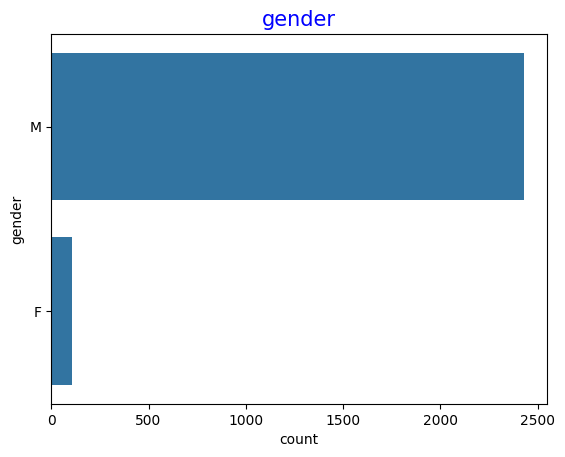

In [33]:
# kill properties
# Manner of death
sns.countplot(kill.gender)
#sns.countplot(kill.manner_of_death)
plt.title("gender",color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Kill weapon')

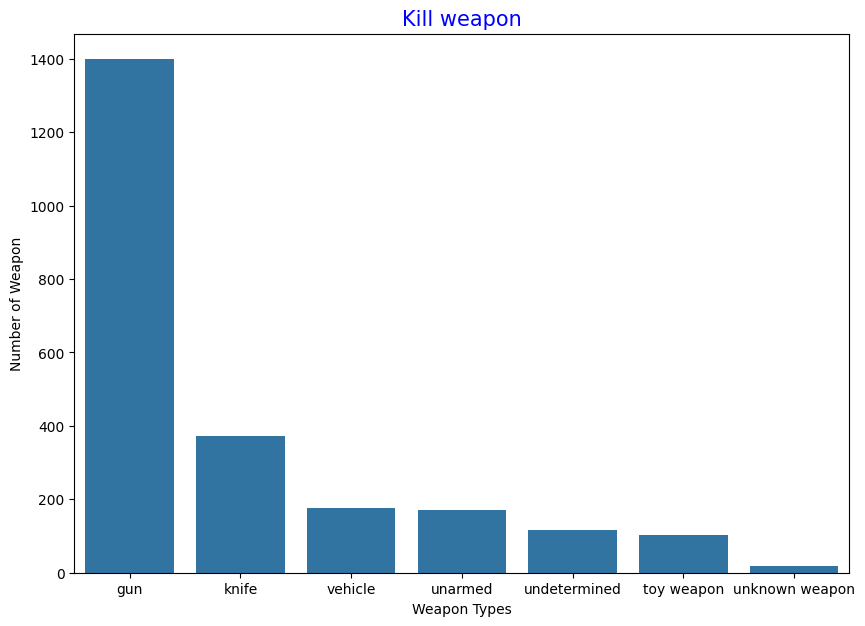

In [34]:
# kill weapon
armed = kill.armed.value_counts()
#print(armed)
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Age of killed people')

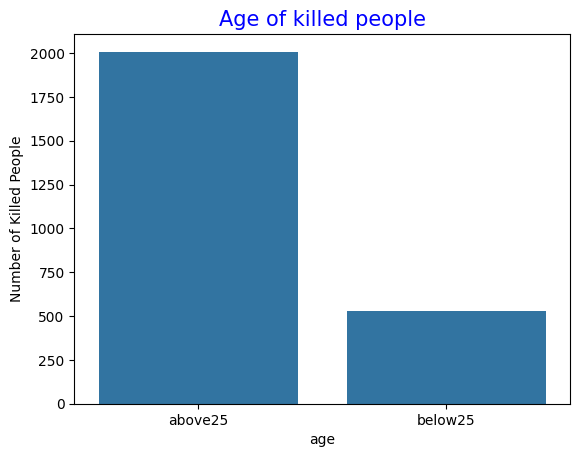

In [37]:
# age of killed people
above25 =['above25' if i >= 25 else 'below25' for i in kill.age]
df = pd.DataFrame({'age':above25})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of killed people',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Race of killed people')

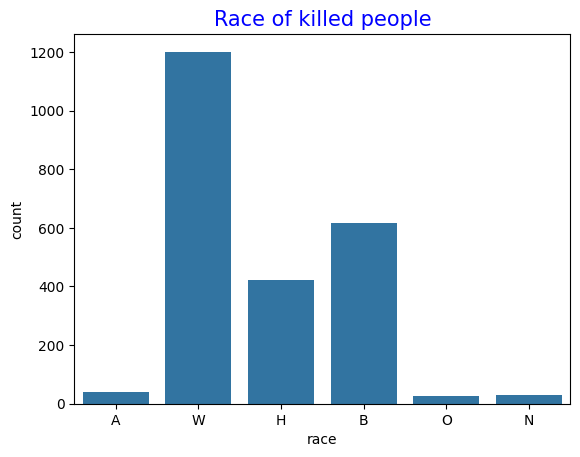

In [38]:
# Race of killed people
sns.countplot(data=kill, x='race')
plt.title('Race of killed people',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Cities with most police killings')

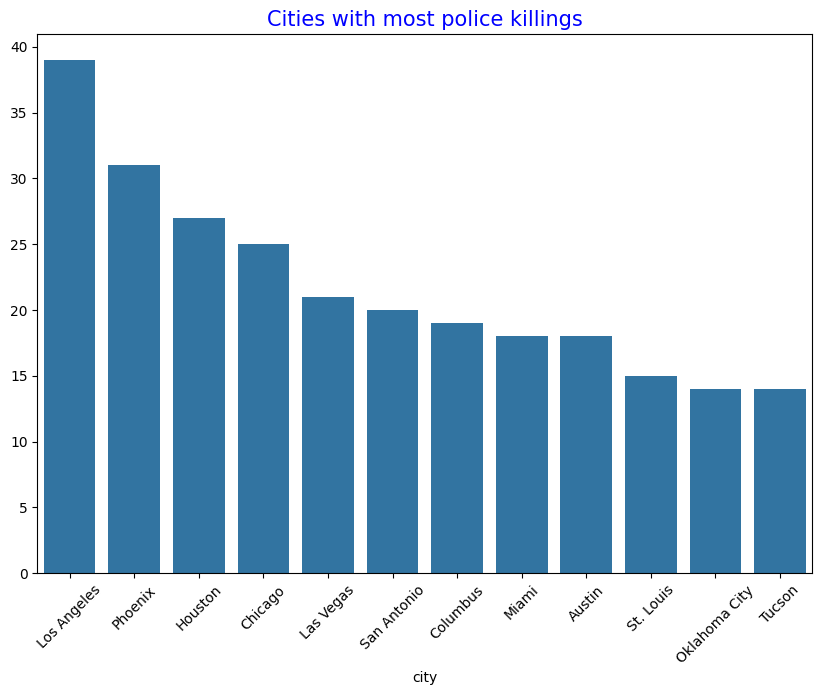

In [ ]:
# Most dangerous cities (according to police killing count)
city = kill.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Cities with most police killings',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'States with most police killings')

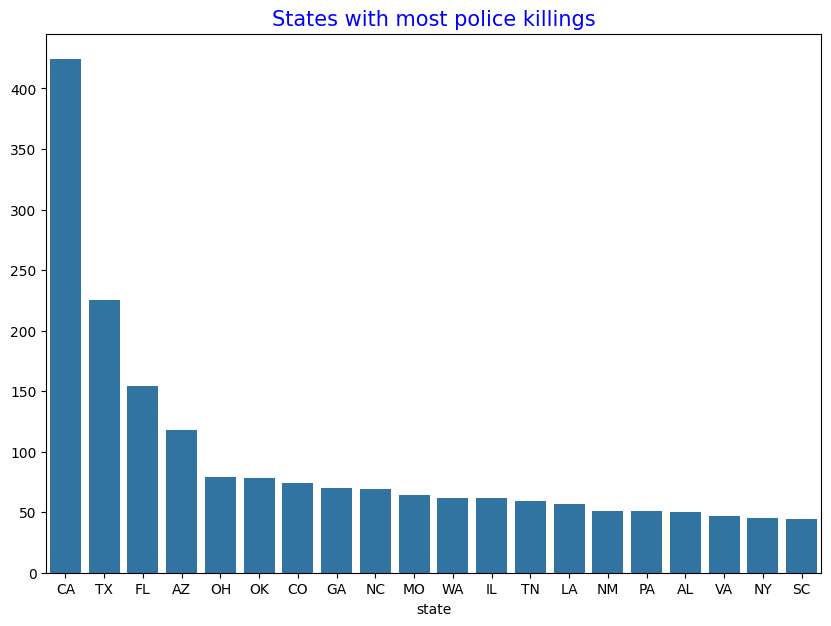

In [40]:
# most dangerous states (according to police killing count)
state = kill.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('States with most police killings',color = 'blue',fontsize=15)

Text(0.5, 1.0, 'Threat types')

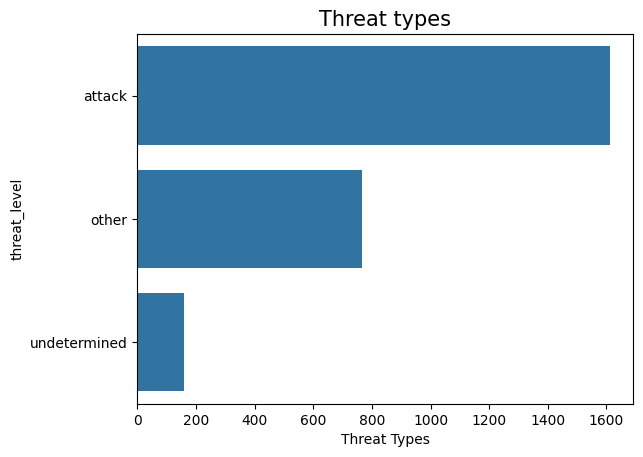

In [45]:
sns.countplot(kill.threat_level)
plt.xlabel('Threat Types')
plt.title('Threat types', fontsize = 15)

Text(0.5, 1.0, 'Flee types')

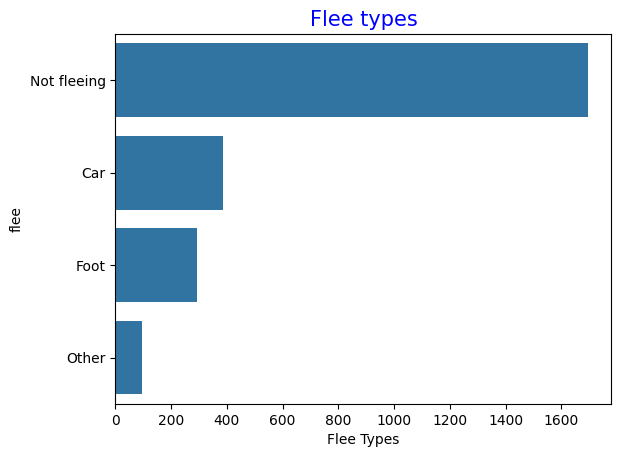

In [46]:
# Flee types
sns.countplot(kill.flee)
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)

Text(0.5, 1.0, 'Kill Numbers from States')

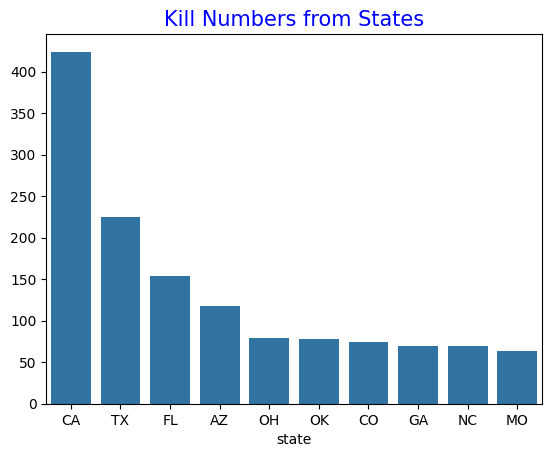

In [48]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
sns.barplot(x=sta,y = kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)